# Tensorflow基础

- 1. 数据集

- 2. 静态计算图

- 3. Keras

- 4. 动态计算图

In [1]:
import tensorflow as tf
# tf.enable_eager_execution()

import numpy as np
import matplotlib.pyplot as plt

import os
import gzip

In [2]:
tf.__version__

'1.12.0'

# 1. 数据集

https://github.com/zalandoresearch/fashion-mnist

## 1.0 预备知识

- gzip: https://docs.python.org/3/library/gzip.html#gzip.open
- numpy: https://www.numpy.org/devdocs/user/quickstart.html

In [3]:
# 创建ndarray

a = np.array([[1, 2], [3, 4]])

print(type(a))
print(a)

<class 'numpy.ndarray'>
[[1 2]
 [3 4]]


In [4]:
# ndarray形状（shape）
print(a.shape)

x = a.reshape(4, 1)
print(x.shape)

(2, 2)
(4, 1)


In [5]:
# 数据类型

print(a.dtype)

b = np.array([1.1, 2.2], dtype=np.float32)
print(b)
print(b.dtype)


c = a.astype(np.float64)
print(c.dtype)

int64
[1.1 2.2]
float32
float64


- `np.frombuffer()`: https://docs.scipy.org/doc/numpy/reference/generated/numpy.frombuffer.html
- `np.bincount()`: 

- matplotlib plot: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html

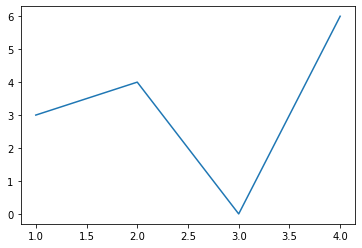

In [6]:
# Plot

x = [1, 2, 3, 4]
y = [3, 4, 0, 6]

plt.plot(x, y)
plt.show()

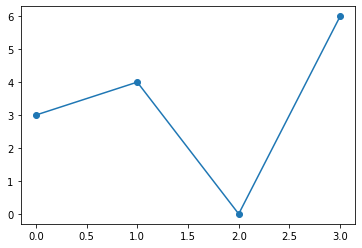

In [7]:
# With points

plt.plot(y, '-o')
plt.show()

## 1.1 加载数据

In [21]:
!ls ./fashion-mnist

t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [8]:
# 数据集文件路径
dataset_dir = './fashion-mnist'
file_names = [
    'train-labels-idx1-ubyte.gz',
    'train-images-idx3-ubyte.gz',
    't10k-labels-idx1-ubyte.gz',
    't10k-images-idx3-ubyte.gz',
]


# 加载训练集中的标签 train_lbs
path = os.path.join(dataset_dir, file_names[0])
with gzip.open(path) as file:
    train_lbs = np.frombuffer(file.read(), np.uint8, offset=8)
print('train_lbs.shape:', train_lbs.shape)


# 加载训练集中的图片 train_imgs
path = os.path.join(dataset_dir, file_names[1])
with gzip.open(path) as file:
    train_imgs = np.frombuffer(file.read(), np.uint8, offset=16)
    train_imgs = train_imgs.reshape(len(train_lbs), 28, 28)
print('train_imgs.shape:', train_imgs.shape)

    
# 加载测试集中的标签 test_lbs
path = os.path.join(dataset_dir, file_names[2])
with gzip.open(path) as file:
    test_lbs = np.frombuffer(file.read(), np.uint8, offset=8)
print('test_lbs.shape:', test_lbs.shape)


# 加载测试集中的图片 x_test
path = os.path.join(dataset_dir, file_names[3])
with gzip.open(path) as file:
    test_imgs = np.frombuffer(file.read(), np.uint8, offset=16)
    test_imgs = test_imgs.reshape(len(test_lbs), 28, 28)
print('test_imgs.shape:', test_imgs.shape)

train_lbs.shape: (60000,)
train_imgs.shape: (60000, 28, 28)
test_lbs.shape: (10000,)
test_imgs.shape: (10000, 28, 28)


## 1.2 查看数据

In [9]:
# 每个类别的名称

n_class = 10

class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

0
T-shirt/top
[  0   0   0   0   0  31 174  28 126 153 166 152 158 158 160 161 157 168
 191 188  18 132 159   7   0   0   0   0]


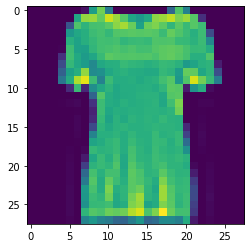

In [10]:
# 展示训练集中第i条数据
i = 10
print(train_lbs[i], )
print(class_names[train_lbs[i]])

print(train_imgs[i][10])
plt.imshow(train_imgs[i])
plt.show()

## 数据预处理

In [11]:
train_x = train_imgs / 255
test_x = test_imgs / 255

train_x = train_x.astype(np.float32)
test_x = test_x.astype(np.float32)

train_y = train_lbs.astype(np.int32)
test_y = test_lbs.astype(np.int32)

print(train_x.dtype, train_y.dtype)
print(train_x[0][10])

float32 int32
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.75686276 0.89411765 0.85490197 0.8352941  0.7764706
 0.7058824  0.83137256 0.8235294  0.827451   0.8352941  0.8745098
 0.8627451  0.9529412  0.7921569  0.        ]


## 数据统计

In [12]:
print(np.bincount(train_y))
print(np.bincount(test_y))

[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


# 2. 静态计算图

## 2.0 知识点

- `tf.placeholder()`: https://tensorflow.google.cn/versions/r1.12/api_docs/python/tf/placeholder

In [16]:
x = tf.placeholder(tf.float32, shape=(3, 3))
y = tf.matmul(x, x)

with tf.Session() as sess:
#     print(sess.run(y))  # ERROR: will fail because x was not fed.

    rand_array = np.random.rand(3, 3)
    print(sess.run(y, feed_dict={x: rand_array}))  # Will succeed.

[[0.25631177 0.79096395 0.517663  ]
 [0.06570089 0.48936054 0.25689718]
 [0.11537124 0.46429995 0.30083376]]


- `tf.layers.dense()`: https://tensorflow.google.cn/versions/r1.12/api_docs/python/tf/layers/dense

In [19]:
x = tf.placeholder(tf.float32, shape=(4, 5))
y = tf.layers.dense(x, units=3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    x_data = np.random.rand(4, 5)
    y_data = sess.run(y, feed_dict={x: x_data})
    
    print(type(y_data))
    print(y_data.shape)
    print(y_data.dtype)
    print(y_data)

<class 'numpy.ndarray'>
(4, 3)
float32
[[-0.27386567 -1.479421   -1.6359808 ]
 [-0.41556495 -0.5151276  -0.66104156]
 [-0.3592445  -0.8518529  -1.1306623 ]
 [-0.13582131 -0.29879582 -0.15823813]]


- Dataset
- tf.data.Dataset.from_tensor_slices()
- dataset.batch()
- dataset.make_initializable_iterator()
- iterator.get_next()

- loss
- optim
- acc

## 2.1 模型

In [44]:
# 超参数
n_epochs = 5
batch_size = 64
n_batchs = len(train_x) // batch_size
hidden_size = 128
learning_rate = 0.001


# 数据集
data_x = tf.placeholder(tf.float32, shape=train_x.shape)
data_y = tf.placeholder(tf.int32, shape=train_y.shape)

dataset = tf.data.Dataset.from_tensor_slices((data_x, data_y))
dataset = dataset.batch(batch_size)

iterator = dataset.make_initializable_iterator()
input_x, input_y = iterator.get_next()


# 静态计算图
h = tf.layers.flatten(input_x)
h = tf.layers.dense(h, units=hidden_size, activation='relu')
logits = tf.layers.dense(h, units=n_class)

loss = tf.losses.sparse_softmax_cross_entropy(labels=input_y, logits=logits)
optim = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

acc, acc_op = tf.metrics.accuracy(labels=input_y, predictions=tf.math.argmax(logits, axis=1))


# 运行
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    epoch_loss_list = []
    for epoch in range(1, n_epochs + 1):
        sess.run(iterator.initializer, feed_dict={data_x: train_x, data_y: train_y})
        sess.run(tf.local_variables_initializer())
        batch_loss_list = []
        for i in range(n_batchs):
            _, loss_value, acc_op_value = sess.run([optim, loss, acc_op])
            batch_loss_list.append(loss_value)
        epoch_loss = sum(batch_loss_list) / len(batch_loss_list)
        epoch_loss_list.append(epoch_loss)
        print('[Epoch %d] loss: %.3f | acc: %.3f' % (epoch, epoch_loss, acc_op_value))

[Epoch 1] loss: 0.520 | acc: 0.819
[Epoch 2] loss: 0.389 | acc: 0.860
[Epoch 3] loss: 0.350 | acc: 0.873
[Epoch 4] loss: 0.323 | acc: 0.882
[Epoch 5] loss: 0.303 | acc: 0.889


# 3. Keras

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_25 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_51 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(train_x, train_y,
                    epochs=5,
                    batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.5617 - acc: 0.8086
Epoch 2/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.4105 - acc: 0.8561
Epoch 3/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.3676 - acc: 0.8693
Epoch 4/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.3397 - acc: 0.8782
Epoch 5/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.3238 - acc: 0.8829


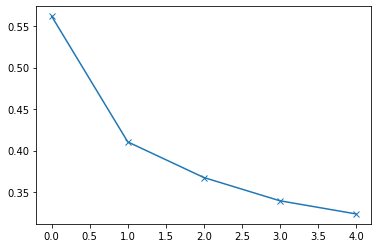

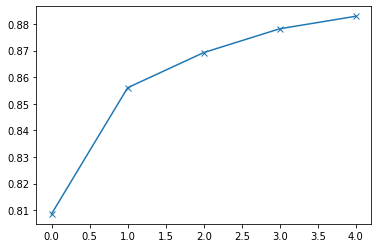

In [48]:
plt.plot(history.history['loss'], '-x')
plt.show()

plt.plot(history.history['acc'], '-x')
plt.show()

# 4. 动态计算图（keras，eager）

- 需restart kernel, 启用Eager Execution

## 4.0 知识点

- `with tf.GradientTape() as tape:`
- `grads = tape.gradient(loss, model.variables)`
- `optim.apply_gradients(zip(grads, model.variables))`

## 4.1 模型

In [8]:
class Model(tf.keras.Model):
    
    def __init__(self):
        super(Model, self).__init__()
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(10)
        
    def call(self, x):
        h = self.flatten(x)
        h = self.dense1(h)
        y = self.dense2(h)
        return y

[Epoch 1] loss: 0.519 | acc: 0.819
[Epoch 2] loss: 0.387 | acc: 0.862
[Epoch 3] loss: 0.347 | acc: 0.876
[Epoch 4] loss: 0.319 | acc: 0.884
[Epoch 5] loss: 0.299 | acc: 0.891


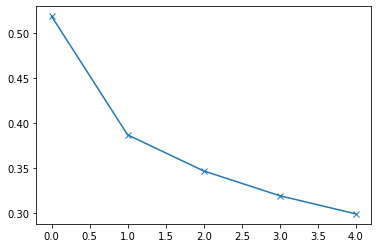

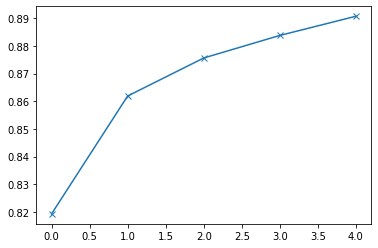

In [15]:
n_epochs = 5

model = Model()
optim = tf.train.AdamOptimizer()


dataset = tf.data.Dataset.from_tensor_slices((train_x, tf.cast(train_y, tf.int64)))
dataset = dataset.batch(64)


epoch_loss_list = []
epoch_acc_list = []
for epoch in range(1, n_epochs + 1):
    batch_loss_list = []
    acc = tf.contrib.eager.metrics.Accuracy()
    for x, y in dataset:
        with tf.GradientTape() as tape:
            logits = model(x)
            loss = tf.losses.sparse_softmax_cross_entropy(labels=y, logits=logits)
            batch_loss_list.append(loss.numpy().item())
            acc(tf.math.argmax(logits, axis=1), y)
        grads = tape.gradient(loss, model.variables)
        optim.apply_gradients(zip(grads, model.variables))
    
    epoch_loss = sum(batch_loss_list) / len(batch_loss_list)
    epoch_loss_list.append(epoch_loss)
    epoch_acc = acc.result().numpy().item()
    epoch_acc_list.append(epoch_acc)
    print('[Epoch %d] loss: %.3f | acc: %.3f' % (epoch, epoch_loss, epoch_acc))
    

plt.plot(epoch_loss_list, '-x')
plt.show()

plt.plot(epoch_acc_list, '-x')
plt.show()